# UCI Credit Card
___________________

**Carolina Tovar Castiblanco**
_____

In [1]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm          import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from pathlib import Path
current_dir = Path('.').resolve()
project_dir = current_dir.parent

print(current_dir)
print(project_dir)

/home/jupyter/ESEIT_BigData/notebooks
/home/jupyter/ESEIT_BigData


In [2]:
file_data = os.path.join(project_dir, 'data', 'raw', 'UCI_Credit_Card.csv')
data = pd.read_csv(file_data, header=0)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

Medata disponible del dataset:

| Campo | Definición | 
| --- | --- | 
| ID |  ID of each client |
|Amount of previous payment in September, 2005 (NT dollar) |  Amount of given credit in NT dollars (includes individual and family/supplementary credit | 
| SEX | Gender (1=male, 2=female) | 
| EDUCATION | (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)  | 
| MARRIAGE |  Marital status (1=married, 2=single, 3=others) | 
| AGE |  Age in years  | 
| PAY_0 |   Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above) | 
| PAY_2 |  Repayment status in August, 2005 (scale same as above) | 
| PAY_3 |  Repayment status in July, 2005 (scale same as above) | 
| PAY_4 |  Repayment status in June, 2005 (scale same as above) | 
| PAY_5 | Repayment status in May, 2005 (scale same as above) | 
| PAY_6 | Repayment status in April, 2005 (scale same as above) | 
| BILL_AMT1 | Amount of bill statement in September, 2005 (NT dollar) | 
| BILL_AMT2 | Amount of bill statement in Agust, 2005 (NT dollar) |
| BILL_AMT3 | Amount of bill statement in July, 2005 (NT dollar) | 
| BILL_AMT4 | Amount of bill statement in June, 2005 (NT dollar) | 
| BILL_AMT5 | Amount of bill statement in May, 2005 (NT dollar) | 
| BILL_AMT6 | Amount of bill statement in April, 2005 (NT dollar) | 
| PAY_AMT1 | Amount of previous payment in September, 2005 (NT dollar) | 
| PAY_AMT2 | Amount of previous payment in Agust, 2005 (NT dollar) | 
| PAY_AMT3 | Amount of previous payment in July, 2005 (NT dollar) | 
| PAY_AMT4 | Amount of previous payment in June, 2005 (NT dollar) | 
| PAY_AMT5 | Amount of previous payment in May, 2005 (NT dollar) | 
| PAY_AMT6 | Amount of previous payment in April, 2005 (NT dollar) | 
| default.payment.next.month |  Default payment (1=yes, 0=no) | 


## Exploración, limpieza y pre procesamiento de datos

**Exploración de las variables demogŕaficas para corroborar que sea consistente con la información de la metadata**

In [4]:
data['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [5]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [6]:
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [7]:
data['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

**Exploración de las variables restantes para corroborar que sea consistente con la información de la metadata**

In [8]:
data['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [9]:
data['PAY_2'].value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

In [10]:
data['PAY_3'].value_counts()

 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64

In [11]:
data['PAY_4'].value_counts()

 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: PAY_4, dtype: int64

In [12]:
data['PAY_5'].value_counts()

 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64

In [13]:
data['PAY_6'].value_counts()

 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64

In [14]:
data['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

___

De la exploración se concluye lo siguiente:
- **EDUCATION** Los que tienen valores 0, 5 y 6 volverlos  4 "others" ya que es la clasificación por defecto cuando no se especifica el nivel educativo

- **MARRIAGE** : Los que son 0 asignarle valor 3 "others" ya que es la clasificación que fue dada por defecto al estado civil diferente a soltero y casado

- **CAMPOS PAY**: Los que contienen valores negativos como -2 y -1 se pueden volver 0 ya que se puede inferir de acuerdo a la descripción que fueron pagados a tiempo


A continuación se realizan los cambios definidos:

___________

In [15]:
col1 = 'EDUCATION'
data[col1].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [16]:
data[col1].replace(0,4,inplace=True)
data[col1].replace(5,4,inplace=True)
data[col1].replace(6,4,inplace=True)
data[col1].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [17]:
col2= 'MARRIAGE'
data[col2].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [18]:
data[col2].replace(0,3,inplace=True)
data[col2].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [19]:
col3='PAY_0'
data[col3].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [20]:
data[col3].replace(-1,0,inplace=True)
data[col3].replace(-2,0,inplace=True)
data[col3].value_counts()

0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: PAY_0, dtype: int64

In [21]:
col4='PAY_2'
data[col4].value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

In [22]:
data[col4].replace(-1,0,inplace=True)
data[col4].replace(-2,0,inplace=True)
data[col4].value_counts()

0    25562
2     3927
3      326
4       99
1       28
5       25
7       20
6       12
8        1
Name: PAY_2, dtype: int64

In [23]:
col5='PAY_3'
data[col5].value_counts()

 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64

In [24]:
data[col5].replace(-1,0,inplace=True)
data[col5].replace(-2,0,inplace=True)
data[col5].value_counts()

0    25787
2     3819
3      240
4       76
7       27
6       23
5       21
1        4
8        3
Name: PAY_3, dtype: int64

In [25]:
col6='PAY_4'
data[col6].value_counts()

 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: PAY_4, dtype: int64

In [26]:
data[col6].replace(-1,0,inplace=True)
data[col6].replace(-2,0,inplace=True)
data[col6].value_counts()

0    26490
2     3159
3      180
4       69
7       58
5       35
6        5
1        2
8        2
Name: PAY_4, dtype: int64

In [27]:
col7='PAY_5'
data[col7].value_counts()

 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64

In [28]:
data[col7].replace(-1,0,inplace=True)
data[col7].replace(-2,0,inplace=True)
data[col7].value_counts()

0    27032
2     2626
3      178
4       84
7       58
5       17
6        4
8        1
Name: PAY_5, dtype: int64

In [29]:
col8='PAY_6'
data[col8].value_counts()

 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64

In [30]:
data[col8].replace(-1,0,inplace=True)
data[col8].replace(-2,0,inplace=True)
data[col8].value_counts()

0    26921
2     2766
3      184
4       49
7       46
6       19
5       13
8        2
Name: PAY_6, dtype: int64

In [31]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


**Descripción de los datos después de estandarizados**

In [32]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.842267,1.557267,35.485500,0.356767,0.320033,0.304067,0.258767,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.744494,0.521405,9.217904,0.760594,0.801727,0.790589,0.761113,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


**One Hot Encondig Variables categóricas**

Si bien todas las variables del dataset  son númericas, hay 4 campos que correponden a variables categóricas. Se trabajará con *SEX*, *EDUCATION* y *MARRRIAGE*.La otra variable categórica  *default.payment.next.month* se quitará el dataset ya que finalmente es el valor que se intenta predecir

In [33]:
#Obtener variables dummy
sex_dummy = pd.get_dummies(data["SEX"], prefix="SEX")
edu_dummy = pd.get_dummies(data["EDUCATION"], prefix="EDUCATION")
marr_dummy = pd.get_dummies(data["MARRIAGE"], prefix="MARRIAGE")

In [34]:
data = pd.concat([data,sex_dummy],  axis = 1)
data = pd.concat([data,edu_dummy],  axis = 1)
data = pd.concat([data,marr_dummy], axis = 1)

In [35]:
data_cred = data.drop([  'SEX',
                         'EDUCATION',
                         'MARRIAGE',], axis = 1)
data_cred

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,default.payment.next.month,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000.0,24,2,2,0,0,0,0,3913.0,...,1,0,1,0,1,0,0,1,0,0
1,2,120000.0,26,0,2,0,0,0,2,2682.0,...,1,0,1,0,1,0,0,0,1,0
2,3,90000.0,34,0,0,0,0,0,0,29239.0,...,0,0,1,0,1,0,0,0,1,0
3,4,50000.0,37,0,0,0,0,0,0,46990.0,...,0,0,1,0,1,0,0,1,0,0
4,5,50000.0,57,0,0,0,0,0,0,8617.0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,39,0,0,0,0,0,0,188948.0,...,0,1,0,0,0,1,0,1,0,0
29996,29997,150000.0,43,0,0,0,0,0,0,1683.0,...,0,1,0,0,0,1,0,0,1,0
29997,29998,30000.0,37,4,3,2,0,0,0,3565.0,...,1,1,0,0,1,0,0,0,1,0
29998,29999,80000.0,41,1,0,0,0,0,0,-1645.0,...,1,1,0,0,0,1,0,1,0,0


In [36]:
data_cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   AGE                         30000 non-null  int64  
 3   PAY_0                       30000 non-null  int64  
 4   PAY_2                       30000 non-null  int64  
 5   PAY_3                       30000 non-null  int64  
 6   PAY_4                       30000 non-null  int64  
 7   PAY_5                       30000 non-null  int64  
 8   PAY_6                       30000 non-null  int64  
 9   BILL_AMT1                   30000 non-null  float64
 10  BILL_AMT2                   30000 non-null  float64
 11  BILL_AMT3                   30000 non-null  float64
 12  BILL_AMT4                   30000 non-null  float64
 13  BILL_AMT5                   300

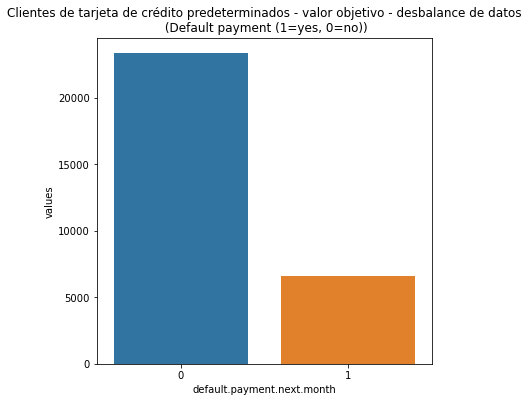

In [37]:
temp = data_cred["default.payment.next.month"].value_counts()
df = pd.DataFrame({'default.payment.next.month': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Clientes de tarjeta de crédito predeterminados - valor objetivo - desbalance de datos\n (Default payment (1=yes, 0=no))')
sns.set_color_codes()
sns.barplot(x = 'default.payment.next.month', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

In [38]:
X = data_cred.iloc[:,1:31]
y = data_cred.iloc[:,1]

In [39]:
print('X shape: ',X.shape)
print('y shape: ',y.shape)

X shape:  (30000, 30)
y shape:  (30000,)


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
                                                    
print("X_train_shape", X_train.shape)
print("y_train_shape", y_train.shape)
print("X_test_shape", X_test.shape)
print("y_test_shape", y_test.shape)

X_train_shape (21000, 30)
y_train_shape (21000,)
X_test_shape (9000, 30)
y_test_shape (9000,)


<AxesSubplot:>

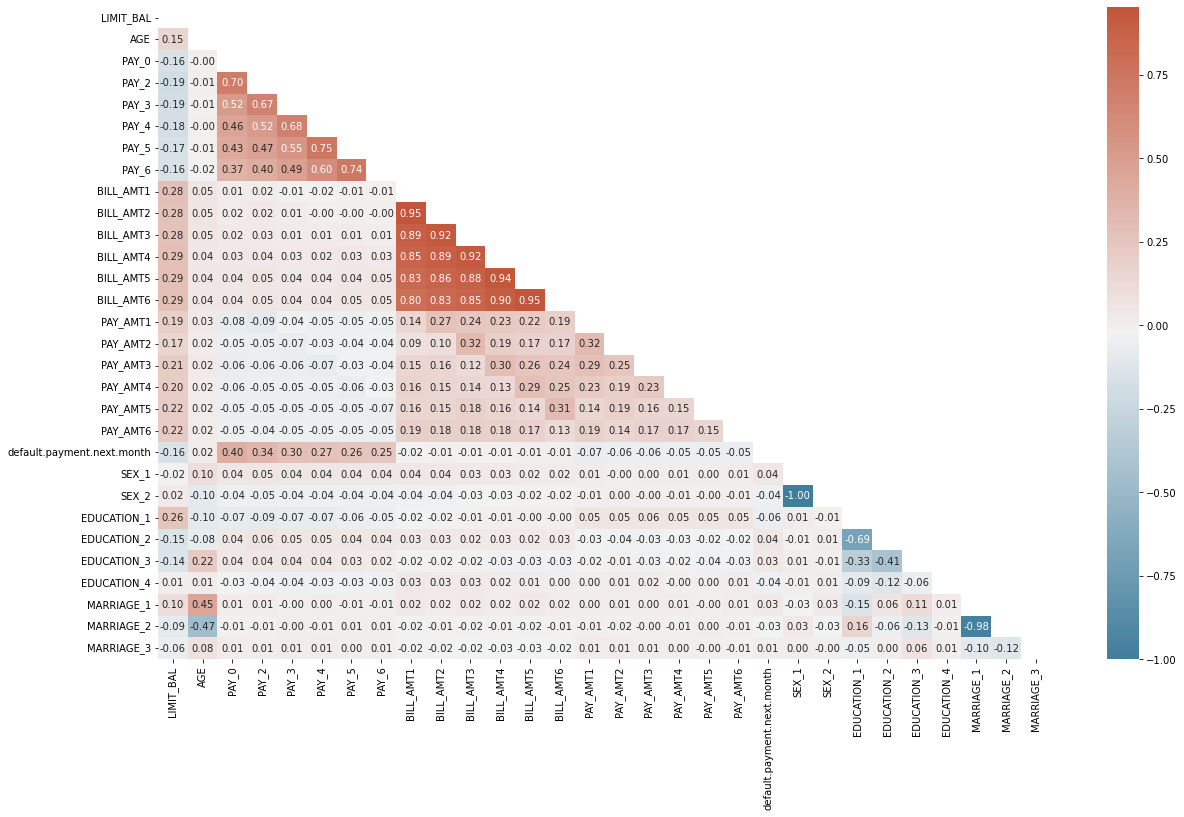

In [41]:
plt.figure(figsize =(20,12))

corr_matrix = X_train.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# crear una matriz angular inferior reemplazar los unos de la matriz y reemplazar

cmap = sns.diverging_palette(230,20, as_cmap=True)
# mapa de color con una difuminación de los colores

sns.heatmap(
    corr_matrix,
    mask  = mask,
    cmap  = cmap,
    annot = True,
    fmt   = '.2f'
)
    

In [42]:
corr_matrix = corr_matrix.abs()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.9)]

X_train = X_train.drop(to_drop, axis=1)
X_test = X_test.drop(to_drop, axis=1)
X_train.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT6,PAY_AMT1,...,PAY_AMT5,PAY_AMT6,default.payment.next.month,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3
28465,240000.0,40,0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,1,1,1,0,0,0,0,0
27622,50000.0,23,0,0,0,0,0,0,660.0,2548.0,...,660.0,2980.0,0,1,1,0,0,0,1,0
28376,50000.0,36,2,2,2,2,0,0,35126.0,0.0,...,3500.0,0.0,0,1,0,1,0,0,0,0
10917,200000.0,54,6,5,4,3,2,2,0.0,0.0,...,0.0,0.0,0,1,0,0,1,0,0,0
27234,240000.0,35,0,0,0,0,0,0,22659.0,2017.0,...,22772.0,22820.0,0,0,1,0,0,0,0,0


In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 28465 to 23654
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   21000 non-null  float64
 1   AGE                         21000 non-null  int64  
 2   PAY_0                       21000 non-null  int64  
 3   PAY_2                       21000 non-null  int64  
 4   PAY_3                       21000 non-null  int64  
 5   PAY_4                       21000 non-null  int64  
 6   PAY_5                       21000 non-null  int64  
 7   PAY_6                       21000 non-null  int64  
 8   BILL_AMT6                   21000 non-null  float64
 9   PAY_AMT1                    21000 non-null  float64
 10  PAY_AMT2                    21000 non-null  float64
 11  PAY_AMT3                    21000 non-null  float64
 12  PAY_AMT4                    21000 non-null  float64
 13  PAY_AMT5                   

In [44]:
data_cred = data_cred[(data_cred['default.payment.next.month'] == 1) |(data_cred['default.payment.next.month'] == 0)]
data_cred['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [45]:
cols = ['PAY_0', 'LIMIT_BAL', 'LIMIT_BAL', 'default.payment.next.month']

data1 = data_cred[~data_cred['PAY_0'].isna()][cols] 
X = data[cols[:-1]].values
y = data[cols[-1]].values

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
print('Total train data: ',X_train.shape)
print('Total test data: ',X_test.shape)

Total train data:  (21000, 3)
Total test data:  (9000, 3)


In [48]:
print('Total train label: ', y_train.shape)
print('Total test label: ', y_test.shape)

Total train label:  (21000,)
Total test label:  (9000,)


In [49]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [50]:
print('Logit Hyperparameters')
print(lr.get_params())
print('svc Hyperparameters')
print(svc.get_params())

Logit Hyperparameters
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
svc Hyperparameters
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [51]:
y_pred_lr = lr.predict(X_test)
y_pred_svc = svc.predict(X_test)

print ('Lr pred:',np.unique(y_pred_lr, return_counts=True))
print ('SVC pred:',np.unique(y_pred_svc, return_counts=True))

Lr pred: (array([0]), array([9000]))
SVC pred: (array([0]), array([9000]))


In [52]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([7040, 1960]))

<BarContainer object of 1 artists>

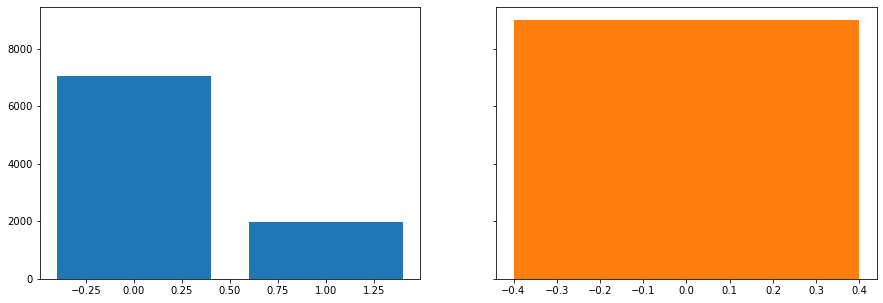

In [53]:
labels_true, values_true = np.unique(y_test, return_counts=True)
labels_pred, values_pred = np.unique(y_pred_lr, return_counts=True)
labels_pred_svc, values_pred_svc = np.unique(y_pred_svc, return_counts=True)

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 5), sharey=True)
ax[0].bar(labels_true, values_true)
ax[1].bar(labels_pred, values_pred)
ax[1].bar(labels_pred_svc, values_pred_svc)

In [54]:
lr_conf_matrix = confusion_matrix(y_test, y_pred_lr)
lr_conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

In [55]:
lr_conf_matrix

array([[7040,    0],
       [1960,    0]])

In [56]:
lr_conf_matrix_svc

array([[7040,    0],
       [1960,    0]])

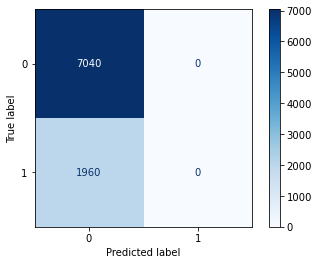

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, cmap='Blues')

In [58]:
print('Logistic Regression Performance:')
print('Accuracy:                ', accuracy_score(y_test, y_pred_lr))

print('Precission No Paga:      ', precision_score(y_test, y_pred_lr, pos_label=0))
print('Precission Paga:         ', precision_score(y_test, y_pred_lr, pos_label=1))

print('Recall No Paga           ', recall_score(y_test, y_pred_lr, pos_label=0))
print('Recall Paga              ', recall_score(y_test, y_pred_lr, pos_label=1))

print('F1-score No Paga:        ', f1_score(y_test, y_pred_lr, pos_label=0))
print('F1-score Paga:           ', f1_score(y_test, y_pred_lr, pos_label=1))

Logistic Regression Performance:
Accuracy:                 0.7822222222222223
Precission No Paga:       0.7822222222222223
Precission Paga:          0.0
Recall No Paga            1.0
Recall Paga               0.0
F1-score No Paga:         0.8778054862842892
F1-score Paga:            0.0


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## XGBoost Model

In [59]:
target = 'default.payment.next.month'
predictors = [  'LIMIT_BAL','AGE','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
                'SEX_2','EDUCATION_1','EDUCATION_2','EDUCATION_3','EDUCATION_4','MARRIAGE_2','MARRIAGE_3']

In [62]:
train_df, val_df = train_test_split(data_cred, test_size=0.20, random_state=42, shuffle=True )

In [63]:
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(val_df[predictors], val_df[target].values)

watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = 42

In [64]:
model = xgb.train(params, 
                dtrain, 
                1000, 
                watchlist, 
                early_stopping_rounds=50, 
                maximize=True, 
                verbose_eval=50)

[05:23:57] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.67102	valid-auc:0.66074


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:528: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  format(", ".join(args_msg)), FutureWarning


[50]	train-auc:0.76861	valid-auc:0.76368
[100]	train-auc:0.77668	valid-auc:0.76962
[150]	train-auc:0.78077	valid-auc:0.77271
[200]	train-auc:0.78346	valid-auc:0.77453
[250]	train-auc:0.78500	valid-auc:0.77488
[300]	train-auc:0.78670	valid-auc:0.77534
[350]	train-auc:0.78807	valid-auc:0.77524
[362]	train-auc:0.78859	valid-auc:0.77514


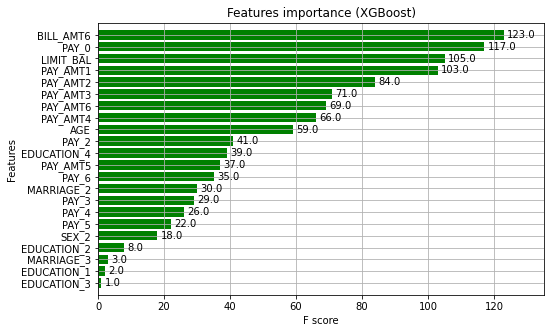

In [65]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()